In [2]:
import pandas as pd
from sklearn import datasets

In [3]:
data = datasets.load_diabetes()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
target = pd.Series(data.target)
target.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
dtype: float64

In [8]:
import seaborn as sns
import numpy as np

<Axes: ylabel='Count'>

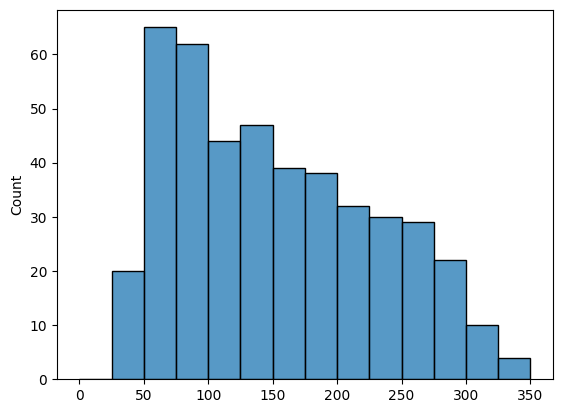

In [9]:
sns.histplot(target, bins=np.arange(0, 351, 25))

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(df, target) # "Train" the df using the df

LinearRegression()

In [13]:
preds = model.predict(df) # Predict using the df (but using the actual df rather than a training set lol)

In [14]:
target.mean(), preds.mean() # Wow it perfectly fits the data

(np.float64(152.13348416289594), np.float64(152.13348416289594))

In [15]:
diffs = target - preds

<Axes: ylabel='Count'>

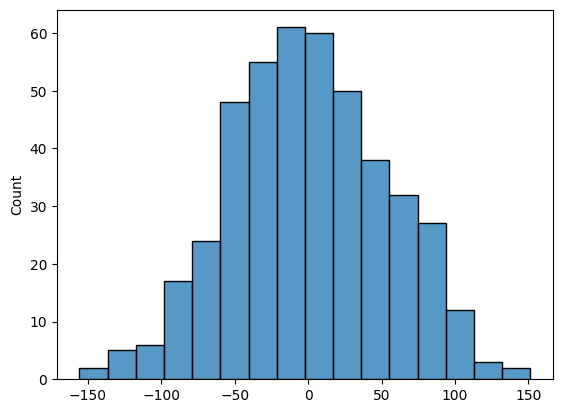

In [16]:
sns.histplot(diffs)

In [17]:
from sklearn.metrics import root_mean_squared_error

In [18]:
print(root_mean_squared_error(target, preds)) # Calculate the accuracy of our model

53.47612876402657


In [19]:
df.shape # We will use 400 rows as our training, and 42 rows as our validation

(442, 10)

In [33]:
# You'll learn a better way to do this. Do NOT do this! (It is not randomized)

X_train = df.iloc[0:400, :] # [Range of rows (exclusive), all columns]
X_test = df.iloc[400:, :]

In [21]:
# Whatever you do to X, must be used to Y (since predictions are 1-1)

Y_train = target.iloc[0:400] # Y is a series
Y_test = target.iloc[400:]

In [22]:
len(X_train), len(X_test)

(400, 42)

In [23]:
model.fit(X_train, Y_train)

LinearRegression()

In [24]:
preds = model.predict(X_train) # First predict with the training data

In [25]:
print(root_mean_squared_error(Y_train, preds))

54.66607310703036


In [26]:
preds_test = model.predict(X_test)

In [27]:
print(root_mean_squared_error(Y_test, preds_test))

40.84983849501813


In [28]:
model.coef_ # Look at our beta coefficients

array([   5.02872485, -238.41102821,  521.64045821,  299.93312103,
       -752.08800504,  445.12464148,   83.49819741,  185.57383964,
        706.455549  ,   88.68671274])

In [29]:
from sklearn.linear_model import Ridge # L_2 regularization time

In [30]:
alphas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] # Constant that multiples the L_2 term (lambda)
# When alpha = 0, there is no regularization penalty (equivalent to OLS), higher alpha = stronger penalty

# As alpha increases, the beta coefficient should decrease

In [31]:
# Look at our third beta variable (bmi)

coefs = []
for each in alphas:
    current_model = Ridge(alpha = each)
    current_model.fit(X_train, Y_train) # Use the ridge model and alpha to fit
    coefs.append(current_model.coef_[2]) # Add the bmi beta variable value to our coefs 
    
coefs

[np.float64(521.6404582149869),
 np.float64(522.3237635273048),
 np.float64(522.5521150480319),
 np.float64(484.37734027031786),
 np.float64(285.5656877863566),
 np.float64(67.47367573326616),
 np.float64(8.171160698007213),
 np.float64(0.8358538017465882),
 np.float64(0.08377883988555222)]

<Axes: >

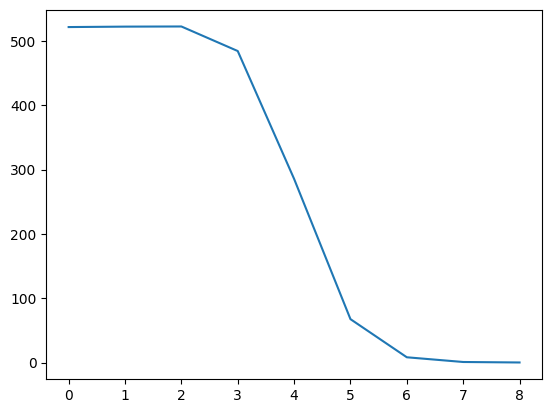

In [32]:
sns.lineplot(coefs)